In [1]:
%pylab inline
import sys
sys.path.append('../code')
from mwlmc_bfe import smooth_coeff
from mwlmc_bfe import coeff_energy
from coefficients_smoothing import read_coeff_matrix
import biff

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def coeff_hist(S):
    vmin = np.ma.masked_invalid(np.log10(np.abs(S[:,:,0].flatten()))).min()
    vmax = np.max(np.log10(np.abs(S)))

    fig, ax = subplots(1, 3, figsize=(14, 4))

    fig.suptitle('LMC coefficients amplitudes', y=1.06)

    for i in range(3):
        im = ax[i].imshow(np.log10(np.abs(((S[:,:,i])))), origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
        ax[i].set_xlim(-0.5, 10)
        ax[i].set_ylim(-0.5, 10)
        ax[i].set_xlabel('$n$')
        ax[i].set_title('$m=${}'.format(i))
        if i ==0:
            ax[i].set_ylabel('$l$')
    #ax[3].set_colorbar()
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels)
    cbar.set_label(r'$\rm{Log_{10}\ S_{nlm}}$')


In [4]:
def coeff_power(S, T, fig_title, fig_name, max_m=0, max_n=0, max_l=0):
    
    vmin = np.ma.masked_invalid(np.log10((S**2 + T**2)**0.5)).min()
    vmax = np.max(np.log10((S**2 + T**2)**0.5))

    index_m = np.where(np.abs(S[:,:,:3])>0)
    if max_m==0:
        max_m = np.max(index_m[2])
    if max_n==0:
        max_n = np.max(index_m[0])
    if max_l==0:
        max_l = np.max(index_m[1])

    print(max_n, max_l)
    if max_m < 4:
        fig, ax = subplots(max_m+1, 1, figsize=(6, 9), sharex=True)
    elif ((max_m < 8) & (max_m>3)):
        fig, ax = subplots(2, 4, figsize=(14, 9), sharex=True, sharey=True)
    elif (max_m>7):
        fig, ax = subplots(3, 4, figsize=(14, 14), sharex=True, sharey=True)
    print(max_m)

    fig.suptitle(fig_title, y=1.02)

    if max_m < 5:
        for i in range(max_m+1):
            im = ax[i].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[i].set_xlim(-1, max_n+1)
            ax[i].set_ylim(-1, max_l+1)
            ax[i].set_ylabel('$l$')
            ax[i].set_title('$m=${}'.format(i))
            ax[i].set_xticks(np.arange(0, max_n+1, 2))
            ax[i].set_yticks(np.arange(0, max_l+1, 2))
            ax[i].set_yticklabels(np.arange(0, max_l+1, 2))

            if i ==2:
                ax[i].set_xlabel('$n$')
    elif (max_m>3):
        j = 0 
        k=0
        for i in range(max_m+1):
            print(j, i)
            im = ax[j][k].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[j][k].set_xlim(-1, max_n+1)
            ax[j][k].set_ylim(-1, max_l+1)
            ax[j][k].set_ylabel('$l$')
            ax[j][k].set_title('$m=${}'.format(i))
            k+=1
            if i == 2:
                ax[j][i].set_xlabel('$n$')
            elif i%3 == 0:
                j+=1 
                k=0
                
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.15, -0.05, 0.8, 0.04])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels, orientation='horizontal')
    cbar.set_label(r'$\rm{Log_{10}\ \left( S_{nlm}^2 + T_{nlm}^2 \right)}$')
    fig.tight_layout()
    fig.savefig(fig_name, bbox_inches='tight')

In [14]:
mass = 1/507925.9301774541
#mass = 1
covmat_s1 = '../data/triaxial_halos/bfe_s1_rs12.7_covmat_sample_'
coeff_s1 = '../data/triaxial_halos/bfe_s1_rs12.7_coeff_sample_'
#mass = 1

covmat_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_covmat_sample_'
coeff_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_coeff_sample_'
#mass = 1

covmat_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_covmat_sample_'
coeff_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_coeff_sample_'

covmat_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_covmat_sample_'
coeff_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_coeff_sample_'
#mass = 1

sn_cut = 5

S_s1, T_s1, N_s1, sn_s1 = smooth_coeff(coeff_s1, covmat_s1, 0, 10, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_q1, T_q1, N_q1, sn_q1 = smooth_coeff(coeff_q1, covmat_q1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_t1, T_t1, N_t1, sn_t1 = smooth_coeff(coeff_t1, covmat_t1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)


S_sph1, T_sph1, N_sph1, sn_sph1 = smooth_coeff(coeff_sph, covmat_sph, 0, 11, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [6]:
sn_cut = 0

S_s, T_s, N_s1, sn_s1 = smooth_coeff(coeff_s1, covmat_s1, 0, 10, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_q, T_q, N_q, sn_q1 = smooth_coeff(coeff_q1, covmat_q1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_t, T_t, N_t, sn_t1 = smooth_coeff(coeff_t1, covmat_t1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)


S_sph, T_sph, N_sph, sn_sph1 = smooth_coeff(coeff_sph, covmat_sph, 0, 11, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [119]:
print(N_sph1)
print(N_s1)
print(N_t1)
print(N_q1)

18
97
354
184


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/

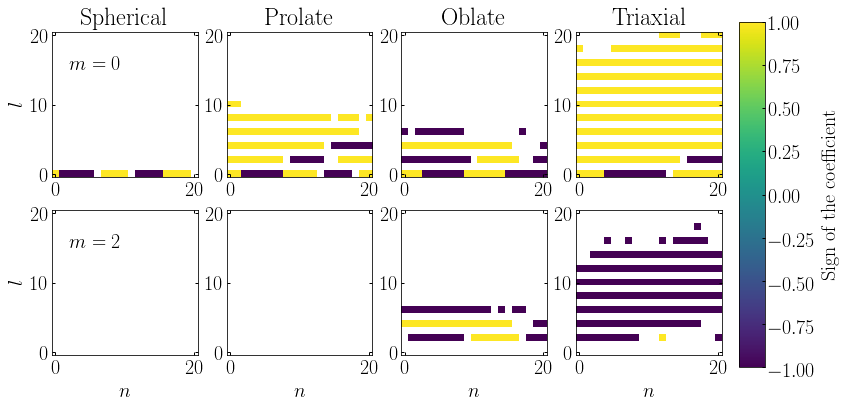

In [183]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax[0][0].set_title('Spherical')
ax[0][1].set_title('Prolate')
ax[0][2].set_title('Oblate')
ax[0][3].set_title('Triaxial')

im = ax[0][0].imshow((S_sph1[:,:,0]/np.abs(S_sph1[:,:,0])).T, origin='lower')
ax[0][1].imshow((S_s1[:,:,0]/np.abs(S_s1[:,:,0])).T, origin='lower')
ax[0][2].imshow((S_q1[:,:,0]/np.abs(S_q1[:,:,0])).T, origin='lower')
ax[0][3].imshow((S_t1[:,:,0]/np.abs(S_t1[:,:,0])).T, origin='lower')

ax[1][0].imshow((S_sph1[:,:,2]/np.abs(S_sph1[:,:,2])).T, origin='lower')
ax[1][1].imshow((S_s1[:,:,2]/np.abs(S_s1[:,:,2])).T, origin='lower')
ax[1][2].imshow((S_q1[:,:,2]/np.abs(S_q1[:,:,2])).T, origin='lower')
ax[1][3].imshow((S_t1[:,:,2]/np.abs(S_t1[:,:,2])).T, origin='lower')

ax[1][0].set_xlabel('$n$')
ax[1][1].set_xlabel('$n$')
ax[1][2].set_xlabel('$n$')
ax[1][3].set_xlabel('$n$')

#ax[3][0].set_ylabel('$l$')
ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')
ax[0][0].text(2, 15, '$m=0$')
ax[1][0].text(2, 15, '$m=2$')

fig_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
cbar = fig.colorbar(im, cax=fig_ax)
cbar.set_label('Sign of the coefficient')
savefig('soc_all_halos.pdf', bbox_inches='tight')
#ax[1][0].colorbar()

In [184]:
U_s1 = coeff_energy(S_s1, T_s1, 0, 21, 21)
U_q1 = coeff_energy(S_q1, T_q1, 0, 21, 21)
U_t1 = coeff_energy(S_t1, T_t1, 0, 21, 21)
U_sph = coeff_energy(S_sph1, T_sph1, 0, 21, 21)


U_s1_2 = coeff_energy(S_s1, T_s1, 6, 21, 21)
U_q1_2 = coeff_energy(S_q1, T_q1, 6, 21, 21)
U_t1_2 = coeff_energy(S_t1, T_t1, 6, 21, 21)

In [10]:
A_sph = np.sqrt(S_sph1**2 + T_sph1**2)
A_s1 = np.sqrt(S_s1**2 + T_s1**2)
A_q1 = np.sqrt(S_q1**2 + T_q1**2)
A_t1 = np.sqrt(S_t1**2 + T_t1**2)

In [11]:
U_sph_all = np.zeros((21, 21, 21))
U_s1_all = np.zeros((21, 21, 21))
U_q1_all = np.zeros((21, 21, 21))
U_t1_all = np.zeros((21, 21, 21))

for i in range(21):
    U_sph_all[:,:,i] = coeff_energy(S_sph1, T_sph1, i, 21, 21)
    U_s1_all[:,:,i] = coeff_energy(S_s1, T_s1, i, 21, 21)
    U_q1_all[:,:,i] = coeff_energy(S_q1, T_q1, i, 21, 21)
    U_t1_all[:,:,i] = coeff_energy(S_t1, T_t1, i, 21, 21)

In [12]:
shape(U_s1_all)

(21, 21, 21)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local

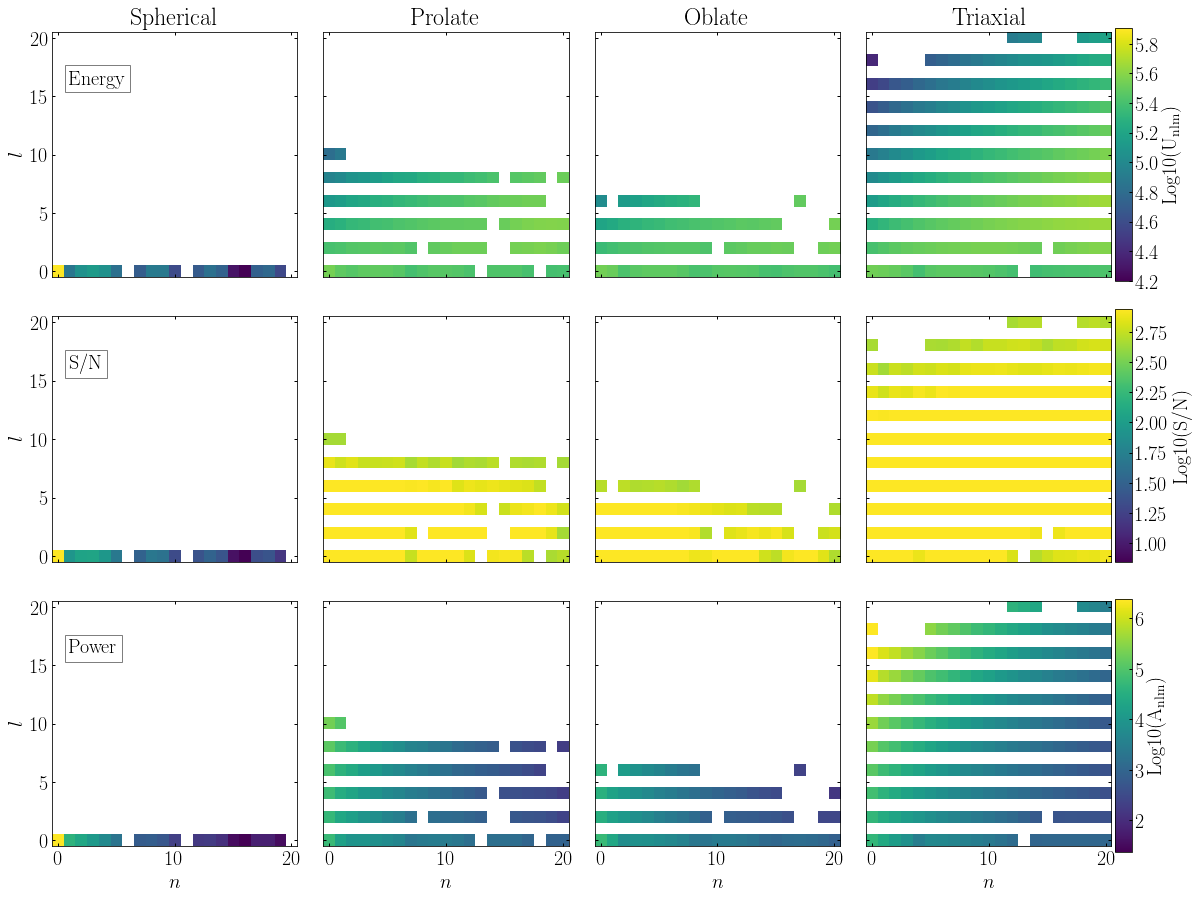

In [181]:
fig, ax = subplots(3, 4, figsize=(16, 13), sharex=True, sharey=True)
m=0
im1 = ax[0][0].imshow(np.log10(np.abs(U_sph.T)), origin='lower')
ax[0][0].set_title('Spherical')
ax[0][1].imshow(np.log10(np.abs(U_s1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][1].set_title('Prolate')
ax[0][2].imshow(np.log10(np.abs(U_q1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][2].set_title('Oblate')
ax[0][3].imshow(np.log10(np.abs(U_t1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][3].set_title('Triaxial')

im2 = ax[1][0].imshow(np.log10(np.abs(sn_sph1[:,:,m].T)), origin='lower')
ax[1][1].imshow(np.log10(np.abs(sn_s1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][2].imshow(np.log10(np.abs(sn_q1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][3].imshow(np.log10(np.abs(sn_t1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)

im3 = ax[2][0].imshow(np.log10(np.abs(A_sph[:,:,m].T)), origin='lower',)
ax[2][1].imshow(np.log10(np.abs(A_s1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][2].imshow(np.log10(np.abs(A_q1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][3].imshow(np.log10(np.abs(A_t1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
"""
ax[3][0].imshow(np.log10(np.abs(U_sph*sn_sph1[:,:,0]/np.max(sn_sph1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][1].imshow(np.log10(np.abs(U_s1*sn_s1[:,:,0]/np.max(sn_s1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][2].imshow(np.log10(np.abs(U_q1*sn_q1[:,:,0]/np.max(sn_q1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][3].imshow(np.log10(np.abs(U_t1*sn_t1[:,:,0]/np.max(sn_t1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
"""
ax[2][0].set_xlabel('$n$')
ax[2][1].set_xlabel('$n$')
ax[2][2].set_xlabel('$n$')
ax[2][3].set_xlabel('$n$')

#ax[3][0].set_ylabel('$l$')
ax[2][0].set_ylabel('$l$')
ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')

ax[0][0].text(1, 16, 'Energy', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[1][0].text(1, 16, 'S/N', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[2][0].text(1, 16, 'Power', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
#ax[3][0].text(1, 16, r'Energy $\times \hat{S/N}$', color='k', 
#              bbox=dict(facecolor='w', alpha=0.5))
fig_ax1 = fig.add_axes([0.98, 0.68, 0.015, 0.27])
cbar1 = fig.colorbar(im1, cax=fig_ax1)
cbar1.set_label(r'$\rm{Log10(U_{nlm})}$')

fig_ax2 = fig.add_axes([0.98, 0.38, 0.015, 0.27])
cbar2 = fig.colorbar(im2, cax=fig_ax2)
cbar2.set_label(r'$\rm{Log10(S/N)}$')
fig_ax3 = fig.add_axes([0.98, 0.07, 0.015, 0.27])
cbar3 = fig.colorbar(im3, cax=fig_ax3)
cbar3.set_label(r'$\rm{Log10(A_{nlm})}$')

fig.tight_layout()

savefig('trixial_halo_energy.pdf', bbox_inches='tight')

In [17]:
def cumulative(x):
    #x_clean = x.flatten()[np.where(x.flatten()!=0)]
    x_clean = x.flatten()
    x_sort = x_clean[np.argsort(x_clean)][::-1]
    x_cumulative = np.zeros(len(x_sort))
    for i in range(len(x_sort)):
        x_cumulative[i] = np.sum(x_sort[:i])
    return x_cumulative

def cumulative_rev(x):
    #x_clean = x.flatten()[np.where(x.flatten()!=0)]
    #x_sort = x_clean[np.argsort(x_clean)][::-1]
    x_clean = x.flatten()
    x_sort = x_clean[np.argsort(x_clean)][::-1]

    x_cumulative = np.zeros(len(x_sort))
    for i in range(len(x_sort)):
        x_cumulative[i] = np.sum(x_sort[:-(i+1)])
    return x_cumulative

In [18]:
A_sph = np.sqrt(S_sph1**2 + T_sph1**2)
A_s = np.sqrt(S_s1**2 + T_s1**2)
A_q = np.sqrt(S_q1**2 + T_q1**2)
A_t = np.sqrt(S_t1**2 + T_t1**2)

In [19]:
U_sph1_cum = cumulative(np.abs(U_sph_all))
U_s1_cum = cumulative_rev(-U_s1_all)
U_q1_cum = cumulative_rev(-U_q1_all)
U_t1_cum = cumulative_rev(-U_t1_all)

In [20]:
A_sph_cum = cumulative_rev(A_sph)
A_s_cum = cumulative_rev(A_s)
A_q_cum = cumulative_rev(A_q)
A_t_cum = cumulative_rev(A_t)

In [21]:
sn_sph_cum = cumulative_rev(sn_sph1)
sn_s_cum = cumulative_rev(sn_s1)
sn_q_cum = cumulative_rev(sn_q1)
sn_t_cum = cumulative_rev(sn_t1)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


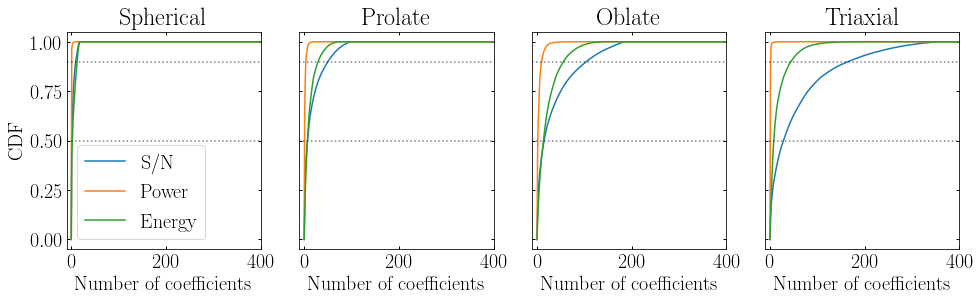

In [185]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

ax[0].set_title('Spherical')
ax[1].set_title('Prolate')
ax[2].set_title('Oblate')
ax[3].set_title('Triaxial')

ax[0].plot(sn_sph_cum[::-1]/np.abs(sn_sph_cum[0]), label='S/N')
ax[1].plot(sn_s_cum[::-1]/np.abs(sn_s_cum[0]))
ax[2].plot(sn_q_cum[::-1]/np.abs(sn_q_cum[0]))
ax[3].plot(sn_t_cum[::-1]/np.abs(sn_t_cum[0]))


ax[0].plot(A_sph_cum[::-1]/np.abs(A_sph_cum[0]), label='Power')
ax[1].plot(A_s_cum[::-1]/np.abs(A_s_cum[0]))
ax[2].plot(A_q_cum[::-1]/np.abs(A_q_cum[0]))
ax[3].plot(A_t_cum[::-1]/np.abs(A_t_cum[0]))

ax[0].plot(U_sph1_cum/np.abs(U_sph1_cum[-1]), label='Energy')
ax[1].plot(U_s1_cum[::-1]/np.abs(U_s1_cum[0]))
ax[2].plot(U_q1_cum[::-1]/np.abs(U_q1_cum[0]))
ax[3].plot(U_t1_cum[::-1]/np.abs(U_t1_cum[0]))



ax[0].legend()
for i in range(4):
    ax[i].set_xlabel('Number of coefficients')
    ax[i].axhline(0.9, c='k', alpha=0.5, ls=':')
    ax[i].axhline(0.5, c='k', alpha=0.5, ls=':')
    ax[i].set_xlim(-10, 400)
ax[0].set_ylabel('CDF')

savefig('CDF_all_halo.pdf', bbox_inches='tight')

In [161]:
def density_slab(fig, ax, S, T, vmin, vmax, delta=0, S2=0, T2=0):
    y_grid = np.arange(-200, 200, 1.5)
    z_grid = np.arange(-200, 200, 1.5)
    y_grid, z_grid = meshgrid(y_grid, z_grid)
    bins=len(np.arange(-200, 200, 1.5))

    xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                         y_grid.flatten(),
                                         z_grid.flatten()]).T)

    rho_biff = biff.density(np.ascontiguousarray(xyz), S, T, M=1, r_s=40.85)


    #figsize(10,4)
    #subplot(1, 2, 1)
    
    if delta==0:
        im = ax.contourf(y_grid, z_grid, np.log10(np.abs(rho_biff)).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', vmin=vmin, vmax=vmax)

    #subplot(1, 2, 2)
    elif delta==1:
        if type(S2) != int:
            rho_biff_base = biff.density(np.ascontiguousarray(xyz), S2, T2, M=1, r_s=40.85)
        else:
            S_000 = np.zeros((1, 1, 1))
            T_000 = np.zeros((1, 1, 1))
            S_000[0][0][0] = S[0][0][0]
            rho_biff_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)
        im = ax.contourf(y_grid, z_grid, ((rho_biff/rho_biff_base)-1).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', vmin=vmin, vmax=vmax)

    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    fig.colorbar(im, ax=ax)

    
def coefficients_viz(fig, ax, m, I, vmin, vmax):
    im = ax.imshow(np.log10(I[:,:,m]).T, origin='lower', vmin=vmin, vmax=vmax)
    return im
    

    
def summary_figure(S, T, N_coeff, I, vmin2, vmax2, fig_name, S2, T2):
    """
    Figure with summary of the coefficients and it's 
    density information 
    
    """

    fig = plt.figure(figsize=(12, 10))

    gs1 = GridSpec(2, 1)
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    density_slab(fig, ax1, S, T, delta=0, vmin=-3, vmax=3)
    density_slab(fig, ax2, S, T, delta=1, vmin=-1, vmax=1, S2=S2, T2=T2)
    ax1.set_title('N coefficients={:02d}'.format(N_coeff))
    ax1.set_xlabel(r'$\rm{y[kpc]}$')
    ax1.set_ylabel(r'$\rm{z[kpc]}$')

    ax2.set_xlabel(r'$\rm{y[kpc]}$')
    ax2.set_ylabel(r'$\rm{z[kpc]}$')

    gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

    gs2 = GridSpec(3, 1)
    m_order=0
    for ss in gs2:
        if m_order==3:
            continue
        else:
            ax = fig.add_subplot(ss)
            im = coefficients_viz(fig, ax, m_order, I, vmin2, vmax2)
            m_order+=1
            ax.set_ylim(-0.5, 16)
            ax.set_ylabel("$l$")
            ax.text(15, 14, '$m=${}'.format(m_order-1))

    ax.set_xlabel("$n$")

    cbar_ax1 = fig.add_axes([0.6, 0.01, 0.33, 0.02])
    fig.colorbar(im, ax=ax, orientation='horizontal', cax=cbar_ax1)


    gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

    # We may try to match the top and bottom of two grids ::
    top = min(gs1.top, gs2.top)
    bottom = max(gs1.bottom, gs2.bottom)

    gs1.update(top=top, bottom=bottom)
    gs2.update(top=top, bottom=bottom)
    #plt.show()
    savefig(fig_name, bbox_inches='tight')


In [178]:
def movie(U, S, T):
    U_norm = U/np.sum(U)
    U_cut = np.linspace(-8, -0.8)
    
    for i in range(40, len(U_cut)):
    #for i in range(0, 10):

        print('this is Energy slice ', i)
        index = np.where(np.log10(U_norm)>=U_cut[i])
        index2 = np.where(np.log10(U_norm)<U_cut[i])
        S_mw_copy = np.copy(S)
        T_mw_copy = np.copy(T)
        S_mw_copy2 = np.copy(S)
        T_mw_copy2 = np.copy(T)
        print(index)


        for j in range(len(index[0])):
            print(index[0][j])
            print(index[1][j])
            print(index[2][j])

            S_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
            T_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
            
            S_mw_copy2[index2[0][j], index2[1][j], index2[2][j]] = 0
            T_mw_copy2[index2[0][j], index2[1][j], index2[2][j]] = 0
            
        N_coeff = np.nonzero(S_mw_copy.flatten())
        print('monopole', S_mw_copy[0,0,0])
        U_mw_c = np.zeros((21, 21, 21))
        for k in range(20):
            #print(k)
            U_mw_c[:,:,k] = coeff_energy(S_mw_copy2, T_mw_copy2, k, 21, 21)

        fig_name = "oblate_plot_u_{:03d}_2.png".format(i)
        summary_figure(S_mw_copy2, T_mw_copy2, 97-len(index[0]), np.abs(U_mw_c), -6, 6, 
                       fig_name, S2=S, T2=T)


this is Energy slice  40
(array([ 0,  9, 10, 11, 12, 12, 13, 13, 14, 15, 15, 16, 16, 16, 17, 17, 17,
       18, 18, 18, 18, 19, 19, 20, 20, 20]), array([0, 2, 2, 2, 2, 4, 2, 4, 6, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 6, 8, 2,
       4, 2, 4, 8]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0]))
0
0
0
9
2
0
10
2
0
11
2
0
12
2
0
12
4
0
13
2
0
13
4
0
14
6
0
15
4
0
15
6
0
16
2
0
16
4
0
16
6
0
17
2
0
17
4
0
17
6
0
18
2
0
18
4
0
18
6
0
18
8
0
19
2
0
19
4
0
20
2
0
20
4
0
20
8
0
monopole 0.0


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.4/dist-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  41
(array([ 0, 10, 11, 12, 13, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19,
       19, 20, 20, 20]), array([0, 2, 2, 2, 2, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 2, 4, 8]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
0
0
0
10
2
0
11
2
0
12
2
0
13
2
0
15
4
0
15
6
0
16
2
0
16
4
0
16
6
0
17
2
0
17
4
0
17
6
0
18
2
0
18
4
0
18
6
0
19
2
0
19
4
0
20
2
0
20
4
0
20
8
0
monopole 0.0
this is Energy slice  42
(array([ 0, 11, 12, 13, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20,
       20, 20]), array([0, 2, 2, 2, 4, 2, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 2, 4, 8]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
0
0
0
11
2
0
12
2
0
13
2
0
15
4
0
16
2
0
16
4
0
16
6
0
17
2
0
17
4
0
17
6
0
18
2
0
18
4
0
18
6
0
19
2
0
19
4
0
20
2
0
20
4
0
20
8
0
monopole 0.0
this is Energy slice  43
(array([ 0, 11, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20]), array([0, 2, 2, 4, 2, 4, 6, 2, 4, 6, 2, 4, 2, 4]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 

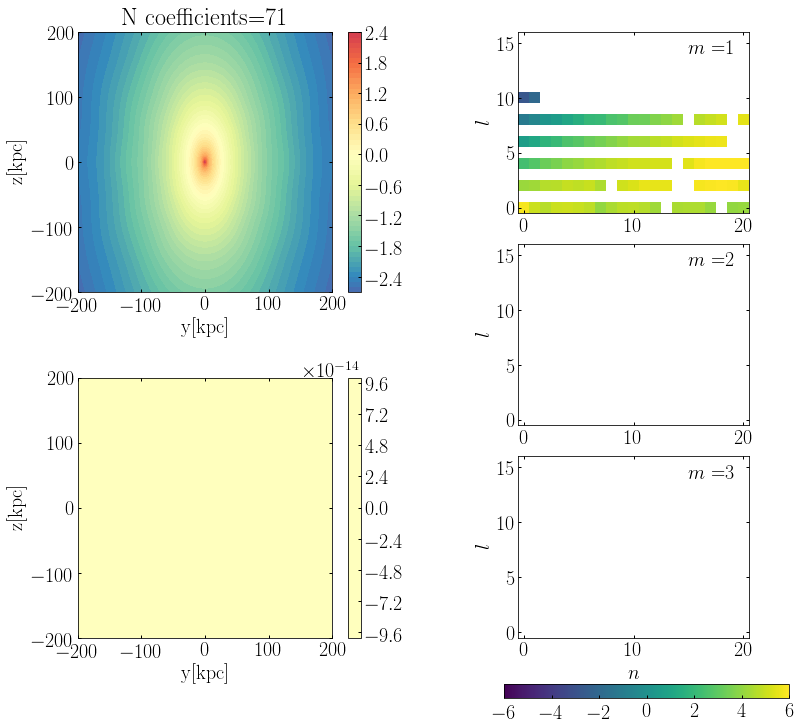

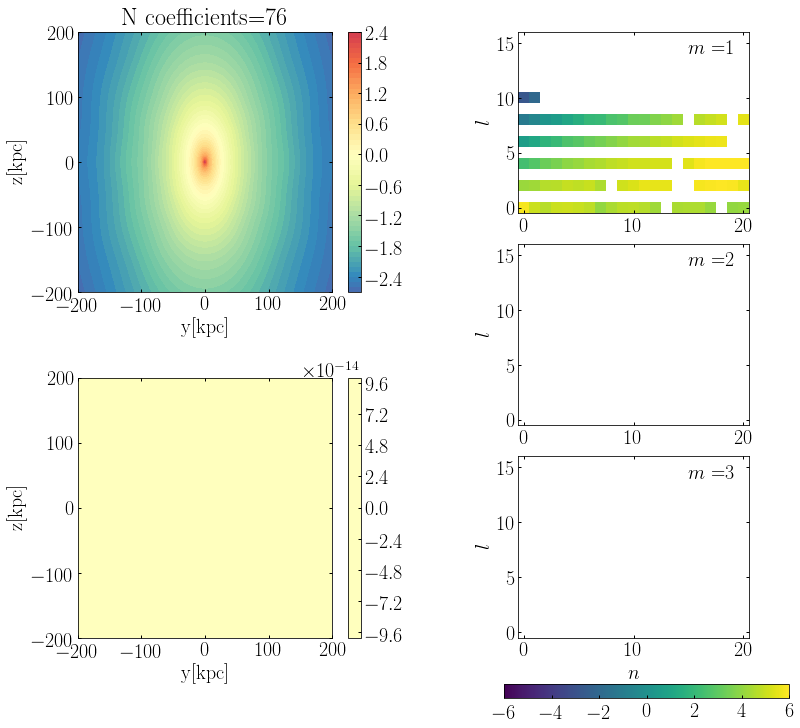

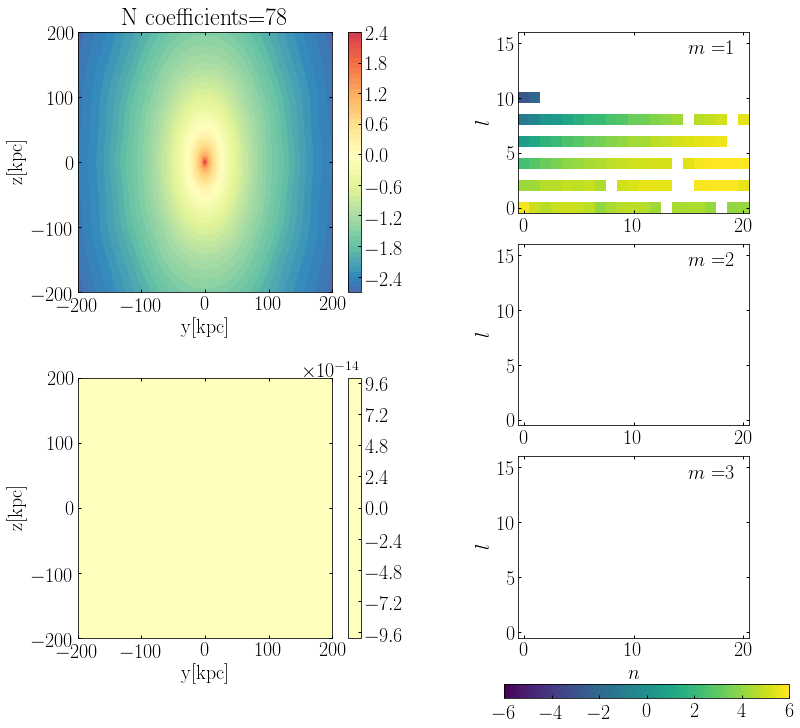

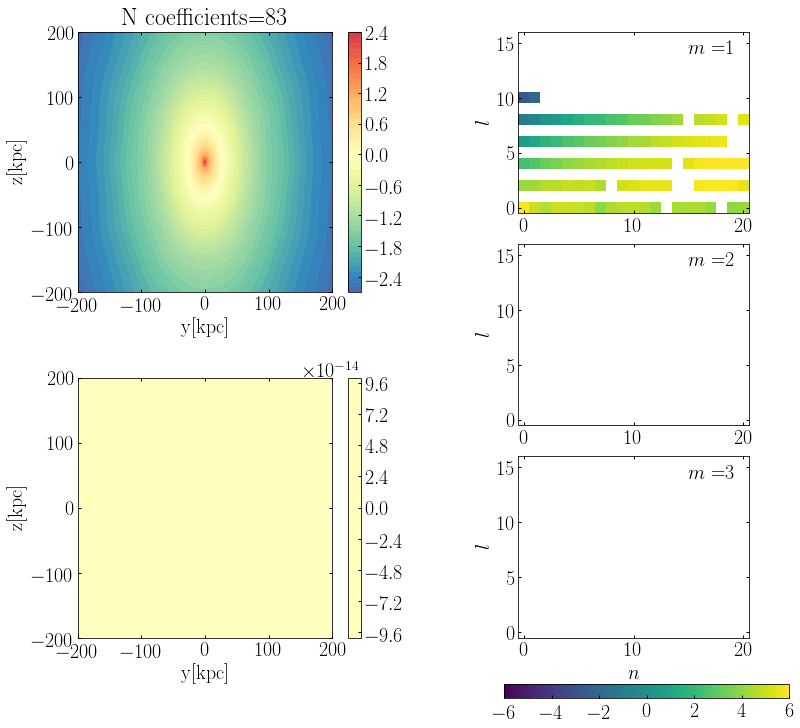

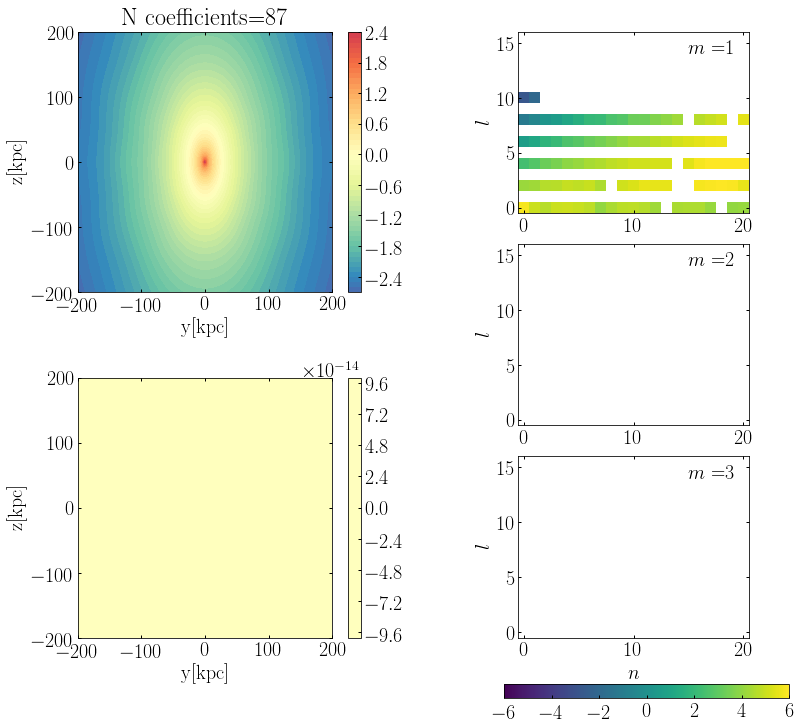

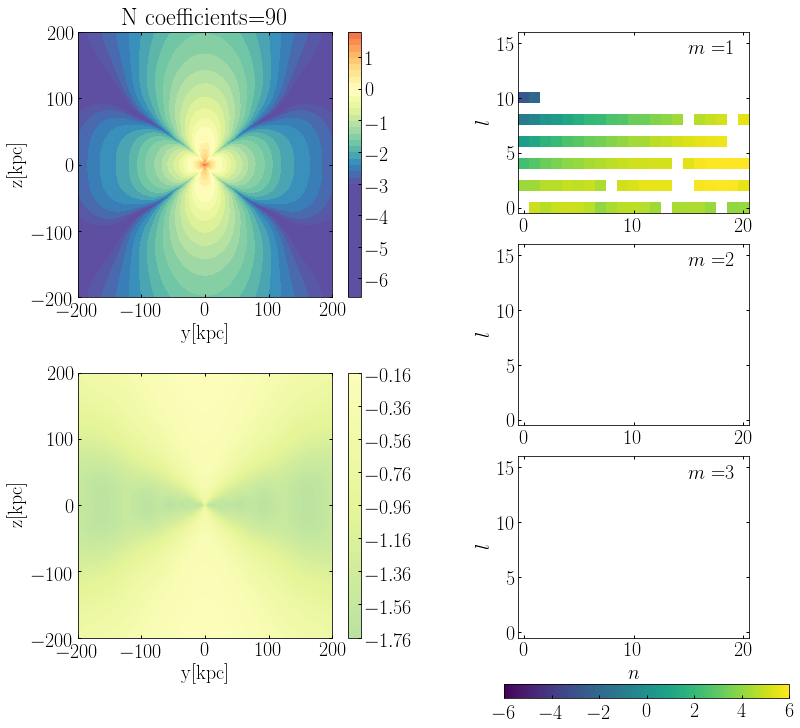

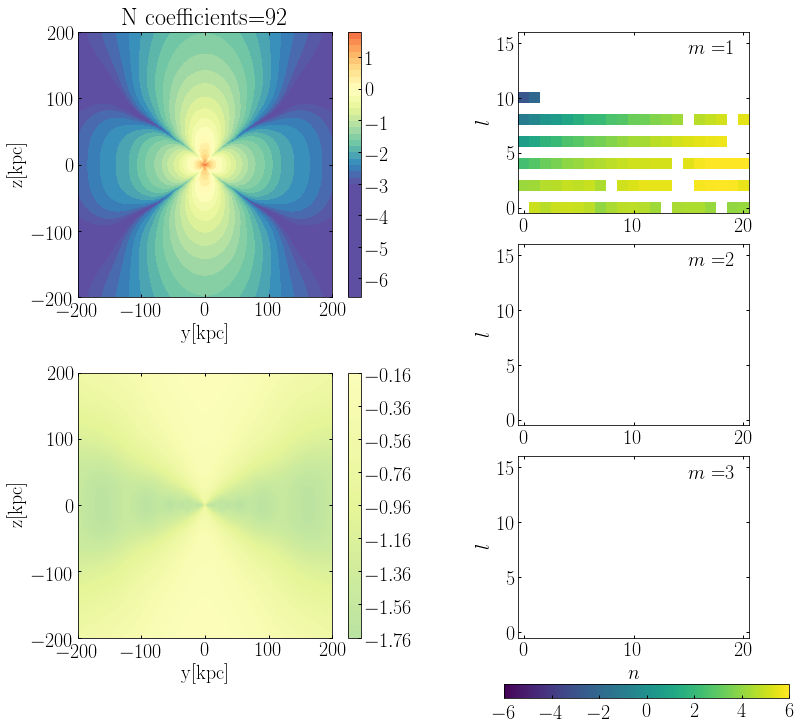

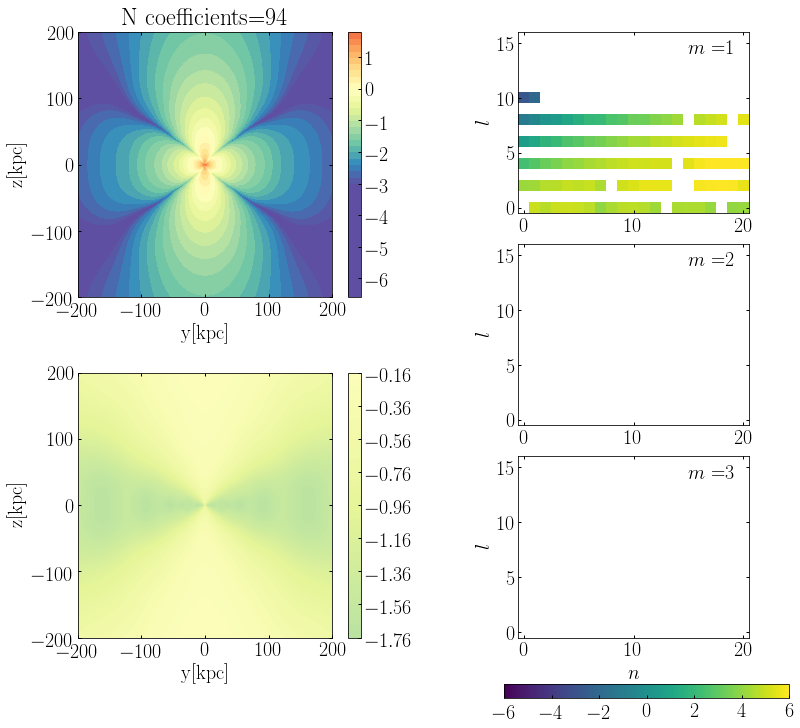

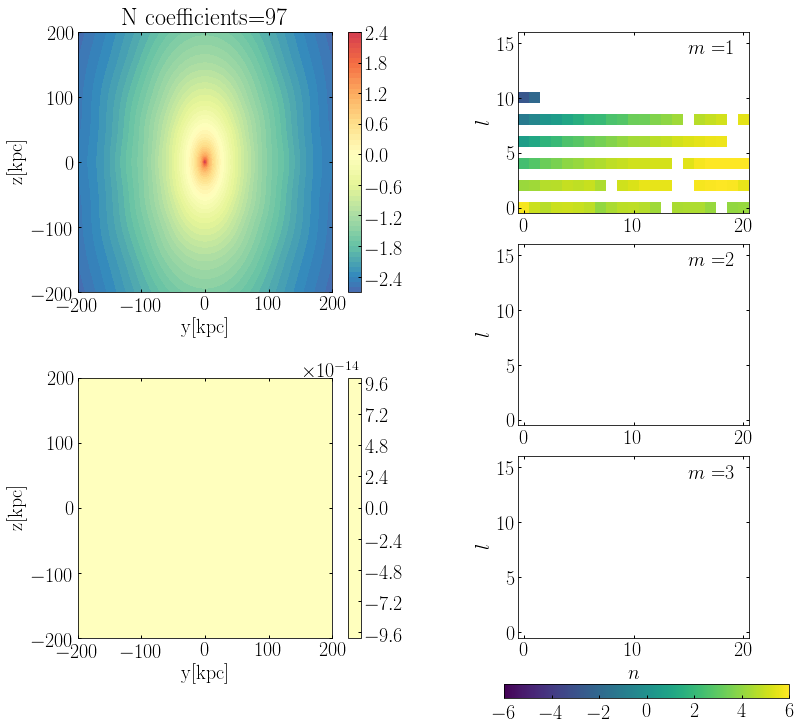

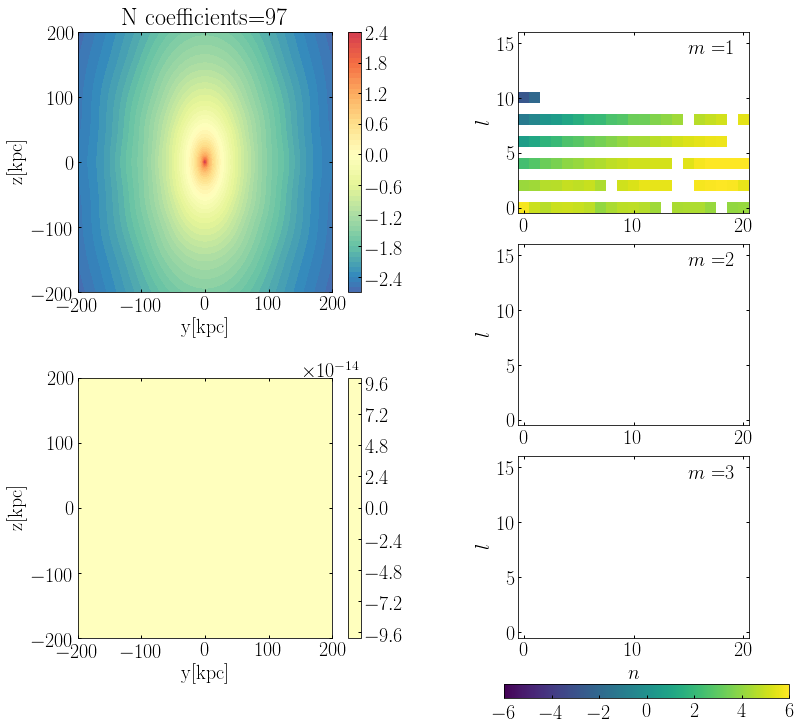

In [179]:
movie(np.abs(U_s1_all), S_s1, T_s1)


In [142]:
np.min(U_s1_all)

-1913440.691280626

In [138]:
np.argmax(U_s1)

1

In [175]:
len(np.linspace(-8, -0.8))


50

In [167]:
len(S_s1[:,:,0].flatten())

441